#Bitcoin parsing


In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import datetime as dt
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

In [3]:
import yfinance as yf

In [4]:
btc = yf.Ticker('BTC-USD').history(start="2014-09-01",  end=dt.datetime.now()).reset_index(level=0)
btc

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...,...
2836,2022-06-23,19986.607422,21135.761719,19950.117188,21085.876953,26188097173,0,0
2837,2022-06-24,21084.648438,21472.917969,20777.511719,21231.656250,24957784918,0,0
2838,2022-06-25,21233.609375,21520.914062,20964.585938,21502.337891,18372538715,0,0
2839,2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,18027170497,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


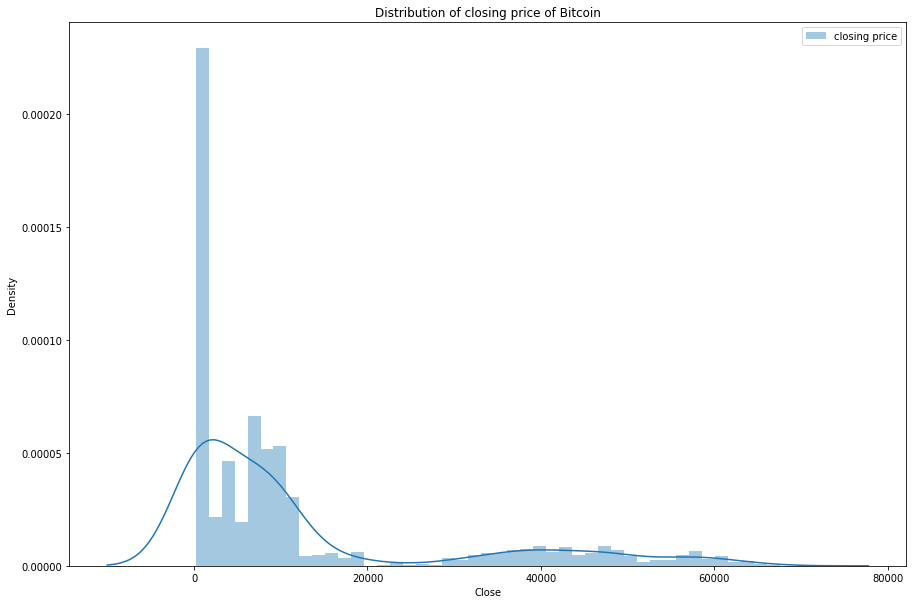

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(btc['Close'], kde=True, label='closing price') #default bins using Freedman-Diaconis rule.

plt.title("Distribution of closing price of Bitcoin")
plt.legend(loc='best')
plt.show()

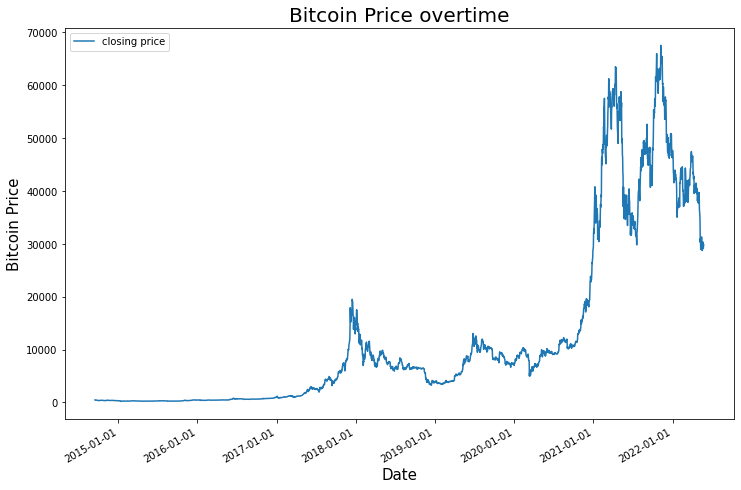

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(btc.Date, btc.Close, label='closing price')
plt.gcf().autofmt_xdate()
plt.xlabel("Date", fontsize=15)
plt.ylabel("Bitcoin Price", fontsize=15)
plt.title("Bitcoin Price overtime", fontsize=20)
plt.legend(loc='best')
plt.show()

In [ ]:
del btc['Dividends'],btc['Stock Splits'],btc['Open'], btc['High'],btc['Low']

In [ ]:
btc.rename(columns = {'Date':'date'}, inplace = True)
btc.set_index('date')

,Close,Volume
date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100
...,...,...
2022-05-21,29432.226562,17274840442
2022-05-22,30323.722656,21631532270
2022-05-23,29098.910156,31483454557


In [ ]:
# save to csv
btc.to_csv('btc.csv')

In [ ]:
files.download('btc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Top 100 currencies

In [ ]:
# read data
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = yf.download(coins, start="2014-01-01",  end=dt.datetime.now(), group_by='tickers')
data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1).reset_index(level=0)
data

In [ ]:
coins_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Data/currencies/coins.csv")
coins_df

,Coin,Stablecoin
0,USDT-USD,1
1,BTC-USD,0
2,ETH-USD,0
3,BUSD-USD,1
4,USDC-USD,1
...,...,...
102,ENJ-USD,0
103,ICP-USD,0
104,THETA-USD,0
105,SUN-USD,0


In [ ]:
coins_df = coins_df[coins_df['Stablecoin']!=1]
coins_df

,Coin,Stablecoin
1,BTC-USD,0
2,ETH-USD,0
5,BCH-USD,0
6,BNB-USD,0
7,FLEX-USD,0
...,...,...
102,ENJ-USD,0
103,ICP-USD,0
104,THETA-USD,0
105,SUN-USD,0


In [ ]:
coins = coins_df['Coin'].tolist()
coins

['BTC-USD',
 'ETH-USD',
 'BCH-USD',
 'BNB-USD',
 'FLEX-USD',
 'SOL-USD',
 'XRP-USD',
 'ANC1-USD',
 'WETH-USD',
 'TRX-USD',
 'ETC-USD',
 'DOT-USD',
 'LUNA1-USD',
 'GMT3-USD',
 'AVAX-USD',
 'ADA-USD',
 'FTM-USD',
 'LTC-USD',
 'SHIB-USD',
 'APE3-USD',
 'MATIC-USD',
 'MIR1-USD',
 'DOGE-USD',
 'FIL-USD',
 'LRC-USD',
 'WBNB-USD',
 'NEAR-USD',
 'SAND-USD',
 'WAVES-USD',
 'EOS-USD',
 'USDC1-USD',
 'LINK-USD',
 'ATOM-USD',
 'AAVE-USD',
 'QC-USD',
 'MANA-USD',
 'KRW-USD',
 'REP-USD',
 'GALA-USD',
 'UNI1-USD',
 'XMR-USD',
 'ZIL-USD',
 'AXS-USD',
 'BTG-USD',
 'SUSHI-USD',
 'VET-USD',
 'WIN-USD',
 'GAL2-USD',
 'CNC-USD',
 'WBTC-USD',
 'PEOPLE-USD',
 'CRV-USD',
 'ZEC-USD',
 'WEMIX-USD',
 'KNC-USD',
 'XLM-USD',
 'JASMY-USD',
 'CAKE-USD',
 'RSR-USD',
 'ALGO-USD',
 'BSV-USD',
 'REQ-USD',
 'ENS-USD',
 'NEO-USD',
 'RUNE-USD',
 'DASH-USD',
 'SXP-USD',
 'QTUM-USD',
 'TRY-USD',
 'BETA-USD',
 'SNX-USD',
 'JST-USD',
 'OMG-USD',
 'KAVA-USD',
 'MKR-USD',
 'ZRX-USD',
 'WFTM-USD',
 'ALICE-USD',
 'ICP-USD',
 'DAR-

In [ ]:
coin_df=[]

for coin in coins:
    currency = yf.Ticker(coin).history(start="2014-01-01",  end=dt.datetime.now()).reset_index(level=0)
    currency['Coin'] = coin
    coin_df.append(currency)

In [ ]:
coin_dataset = pd.concat(coin_df, sort=False)
coin_dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Coin
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,BTC-USD
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,BTC-USD
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,BTC-USD
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,BTC-USD
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,BTC-USD
...,...,...,...,...,...,...,...,...,...
1529,2022-05-21,2.544153,2.658180,2.505930,2.594134,43112930,0,0,SNX-USD
1530,2022-05-22,2.594201,2.794941,2.581045,2.736959,50332866,0,0,SNX-USD
1531,2022-05-23,2.735345,2.903907,2.590439,2.600392,101116172,0,0,SNX-USD
1532,2022-05-24,2.600133,2.770496,2.509617,2.621233,89038499,0,0,SNX-USD


In [ ]:
# save to csv
coin_dataset.to_csv('coin_dataset.csv')

In [ ]:
files.download('coin_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
coin_dataset=coin_dataset[["Date","Coin","Close"]]
coin_dataset

,Date,Coin,Close
0,2014-09-17,BTC-USD,457.334015
1,2014-09-18,BTC-USD,424.440002
2,2014-09-19,BTC-USD,394.795990
3,2014-09-20,BTC-USD,408.903992
4,2014-09-21,BTC-USD,398.821014
...,...,...,...
1529,2022-05-21,SNX-USD,2.594134
1530,2022-05-22,SNX-USD,2.736959
1531,2022-05-23,SNX-USD,2.600392
1532,2022-05-24,SNX-USD,2.621233


In [ ]:
coins_dataset2 = pd.pivot_table(coin_dataset,
                 index=["Date"],
                 #values=["Close"],
                 columns=["Coin"],
                 )
coins_dataset2.reset_index(1)

Close                                                    \
Coin          AAVE-USD   ADA-USD  ALGO-USD ALICE-USD  ANC1-USD  APE3-USD   
Date                                                                       
2014-09-17         NaN       NaN       NaN       NaN       NaN       NaN   
2014-09-18         NaN       NaN       NaN       NaN       NaN       NaN   
2014-09-19         NaN       NaN       NaN       NaN       NaN       NaN   
2014-09-20         NaN       NaN       NaN       NaN       NaN       NaN   
2014-09-21         NaN       NaN       NaN       NaN       NaN       NaN   
...                ...       ...       ...       ...       ...       ...   
2022-05-21   91.327911  0.528314       NaN  2.995830  0.083339  8.033517   
2022-05-22   94.463760  0.542618       NaN  3.084820  0.159415  8.041804   
2022-05-23   99.329384  0.512605       NaN  2.853386  0.562778  7.736125   
2022-05-24  106.582802  0.521224       NaN  2.933582  0.348484  7.500408   
2022-05-25  100.497269  0.510092  0.404768  2.867131  0.342474  7.384212   

                                                       ...            \
Coin         ATOM-USD   AVAX-USD    AXS-USD   BAT-USD  ...  WFTM-USD   
Date                                                   ...             
2014-09-17        NaN        NaN        NaN       NaN  ...       NaN   
2014-09-18        NaN        NaN        NaN       NaN  ...       NaN   
2014-09-19        NaN        NaN        NaN       NaN  ...       NaN   
2014-09-20        NaN        NaN        NaN       NaN  ...       NaN   
2014-09-21        NaN        NaN        NaN       NaN  ...       NaN   
...               ...        ...        ...       ...  ...       ...   
2022-05-21  11.051975  29.866652  21.038437  0.388388  ...  0.410930   
2022-05-22  11.424871  31.807362  21.733889  0.408555  ...  0.437546   
2022-05-23  11.132798  29.026232  20.923748  0.385982  ...  0.433900   
2022-05-24  11.082132  29.025648  21.247337  0.394705  ...  0.422531   
2022-05-25  10.764502  27.480888  20.558165  0.385556  ...  0.403501   

                                                                          \
Coin         WIN-USD   XCN-USD   XLM-USD     XMR-USD   XRP-USD   XTZ-USD   
Date                                                                       
2014-09-17       NaN       NaN       NaN         NaN       NaN       NaN   
2014-09-18       NaN       NaN       NaN         NaN       NaN       NaN   
2014-09-19       NaN       NaN       NaN         NaN       NaN       NaN   
2014-09-20       NaN       NaN       NaN         NaN       NaN       NaN   
2014-09-21       NaN       NaN       NaN         NaN       NaN       NaN   
...              ...       ...       ...         ...       ...       ...   
2022-05-21  0.000149  0.000294  0.130632  175.993652  0.414673  1.820658   
2022-05-22  0.000146  0.000303  0.135703  187.160492  0.422337  1.985360   
2022-05-23  0.000147  0.000291  0.129018  185.182312  0.404671  1.879402   
2022-05-24  0.000172  0.000297  0.132841  193.093155  0.408713  2.115144   
2022-05-25  0.000163  0.000295  0.130009  201.590790  0.402692  2.103247   

                                            
Coin           ZEC-USD   ZIL-USD   ZRX-USD  
Date                                        
2014-09-17         NaN       NaN       NaN  
2014-09-18         NaN       NaN       NaN  
2014-09-19         NaN       NaN       NaN  
2014-09-20         NaN       NaN       NaN  
2014-09-21         NaN       NaN       NaN  
...                ...       ...       ...  
2022-05-21  104.627205  0.051810  0.438927  
2022-05-22  107.131058  0.057757  0.451752  
2022-05-23   99.663361  0.052665  0.419827  
2022-05-24  100.082794  0.052294  0.429027  
2022-05-25   97.306107  0.050628  0.412091  

[2808 rows x 95 columns]

In [ ]:
coins_corr_matrix = coins_dataset2.corr(method='spearman')
coins_corr_matrix

Close                                                    \
Coin             AAVE-USD   ADA-USD  ALGO-USD ALICE-USD  ANC1-USD  APE3-USD   
      Coin                                                                    
Close AAVE-USD   1.000000  0.725005  0.625779  0.577414  0.546128  0.506045   
      ADA-USD    0.725005  1.000000  0.849106  0.610100  0.394131  0.441624   
      ALGO-USD   0.625779  0.849106  1.000000  0.597436  0.504600 -0.335664   
      ALICE-USD  0.577414  0.610100  0.597436  1.000000  0.593144  0.469513   
      ANC1-USD   0.546128  0.394131  0.504600  0.593144  1.000000  0.289266   
...                   ...       ...       ...       ...       ...       ...   
      XRP-USD    0.591958  0.810807  0.883838  0.571783  0.601306  0.411915   
      XTZ-USD    0.725857  0.827698  0.711822  0.744960  0.700527  0.396868   
      ZEC-USD    0.641146  0.715450  0.898277  0.499468  0.655782  0.478261   
      ZIL-USD    0.858850  0.895388  0.822880  0.418790  0.527094  0.403517   
      ZRX-USD    0.923810  0.842031  0.786493  0.705533  0.703555  0.753092   

                                                         ...            \
Coin             ATOM-USD  AVAX-USD   AXS-USD   BAT-USD  ...  WFTM-USD   
      Coin                                               ...             
Close AAVE-USD   0.366459  0.199412  0.153548  0.559439  ... -0.056567   
      ADA-USD    0.887502  0.501485  0.659770  0.871848  ...  0.164011   
      ALGO-USD   0.878419  0.832208  0.758591  0.859762  ...  0.715598   
      ALICE-USD  0.391611  0.283229  0.519568  0.676506  ...  0.477086   
      ANC1-USD   0.288530  0.148875  0.081332  0.658248  ...  0.422549   
...                   ...       ...       ...       ...  ...       ...   
      XRP-USD    0.861546  0.589906  0.668367  0.750555  ...  0.412181   
      XTZ-USD    0.765924  0.645444  0.612770  0.750106  ...  0.659263   
      ZEC-USD    0.892079  0.670477  0.508885  0.604580  ...  0.401880   
      ZIL-USD    0.838847  0.268973  0.098474  0.743213  ... -0.054105   
      ZRX-USD    0.852383  0.413165  0.274624  0.744983  ...  0.250126   

                                                                             \
Coin              WIN-USD   XCN-USD   XLM-USD   XMR-USD   XRP-USD   XTZ-USD   
      Coin                                                                    
Close AAVE-USD   0.697383  0.719448  0.934241  0.809695  0.591958  0.725857   
      ADA-USD    0.738244  0.405074  0.839547  0.901120  0.810807  0.827698   
      ALGO-USD   0.811480  0.902597  0.862511  0.876176  0.883838  0.711822   
      ALICE-USD  0.676672  0.828897  0.625766  0.486303  0.571783  0.744960   
      ANC1-USD   0.653161  0.719901  0.681537  0.502079  0.601306  0.700527   
...                   ...       ...       ...       ...       ...       ...   
      XRP-USD    0.872631  0.651953  0.882561  0.826808  1.000000  0.624611   
      XTZ-USD    0.628753  0.309116  0.668936  0.812020  0.624611  1.000000   
      ZEC-USD    0.745388  0.841432  0.819129  0.859712  0.791435  0.661020   
      ZIL-USD    0.668611  0.639824  0.930856  0.883899  0.833351  0.728029   
      ZRX-USD    0.688501  0.587905  0.926405  0.817941  0.801418  0.741706   

                                               
Coin              ZEC-USD   ZIL-USD   ZRX-USD  
      Coin                                     
Close AAVE-USD   0.641146  0.858850  0.923810  
      ADA-USD    0.715450  0.895388  0.842031  
      ALGO-USD   0.898277  0.822880  0.786493  
      ALICE-USD  0.499468  0.418790  0.705533  
      ANC1-USD   0.655782  0.527094  0.703555  
...                   ...       ...       ...  
      XRP-USD    0.791435  0.833351  0.801418  
      XTZ-USD    0.661020  0.728029  0.741706  
      ZEC-USD    1.000000  0.863876  0.795883  
      ZIL-USD    0.863876  1.000000  0.926948  
      ZRX-USD    0.795883  0.926948  1.000000  

[95 rows x 95 columns]

In [ ]:
coins_corr_matrix.iloc[0].tolist()

[1.0,
 0.7250054449671367,
 0.6257788516403209,
 0.577413667110605,
 0.5461284345355332,
 0.506044965444843,
 0.36645900243779744,
 0.19941177771267157,
 0.15354805392925147,
 0.5594393618609074,
 0.8964664098042576,
 0.8506140906748463,
 0.4581156544187152,
 0.5172410876667348,
 0.7209430019734551,
 0.7329079441241342,
 0.6863176476870452,
 0.8236976025560943,
 0.7201695808669676,
 -0.31326082500098923,
 0.5124367471711047,
 0.8633442451750246,
 0.909996627989895,
 0.6367229841230572,
 0.7497349073311131,
 0.8872054320330183,
 0.546660106909304,
 0.8226264378344577,
 0.8420494635187202,
 0.6021304470400938,
 0.40728674800028747,
 0.7611439958872532,
 -0.0008793331894641677,
 0.24996835976496437,
 0.6883116883116883,
 0.018526115252933305,
 0.8506995538996468,
 0.42384198080400615,
 0.9362321890805259,
 0.8567315594878362,
 0.5196203923101351,
 0.7277150410366734,
 0.7850465171557924,
 0.7597553357913998,
 -0.27292954593032515,
 0.47536241114134714,
 0.8117207754517665,
 0.916671991862

In [ ]:
# save to csv
coins_dataset2.to_csv('coins_t.csv')

In [ ]:
files.download('coins_t.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



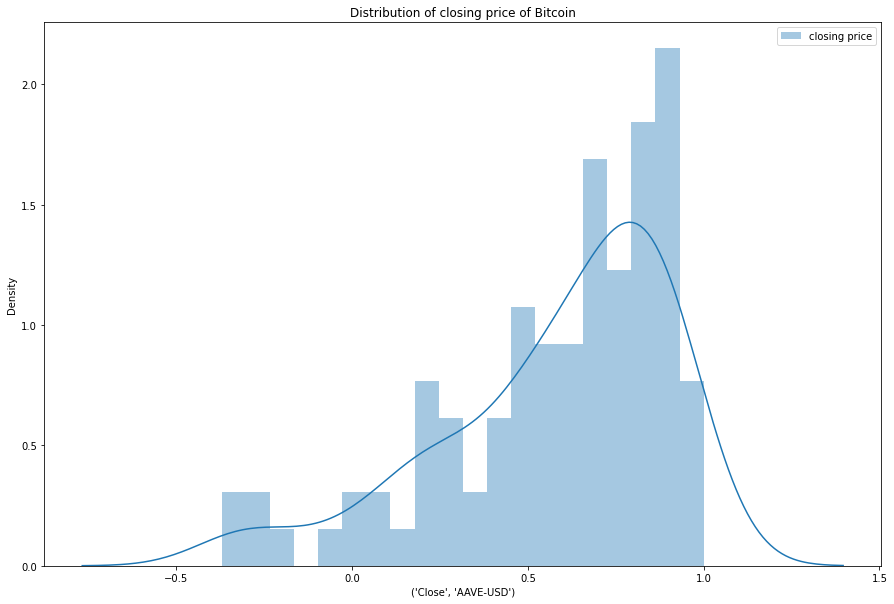

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(coins_corr_matrix.iloc[0], bins=20, kde=True) #default bins using Freedman-Diaconis rule.

plt.title("Distribution of closing price of Bitcoin")
plt.legend(loc='best')
plt.show()

#Twitter

date - дата

day_likes - общее количество лайков за день

day_replies - общее количество ответов за день

day_retweets - общее количество ретвиттов за день

mean_likes - среднее количество лайков за день

mean_replies - среднее количество ответов за день

mean_retweets - среднее количество ретвиттов за день

tweets_vol - количество найденных твиттов за день

unique_users_num - количество уникальных пользователей среди тех, кто запостил найденные твитты, за день

interactivity - метрика взаимодействия из статьи (считается по day_likes, day_replies, day_retweets) за день

mean_sentiment_round - среднее значение sentiments, разбитых по категориям (-1 negative, 0 neutral, +1 positive) за день

mean_sentiment - среднее значение sentiments по их оригинальному значению (-1.0...1.0) за день

sum_sentiment - сумма оригинальных значений sentiment за день

mean_objectivity - средняя объективность найденных твиттов за день (вторая метрика, которую выдаёт TextBlob)

mean_sent_obj_prod - среднее произведений объективности и sentiment за день

fear_greed_labels - категория текущего "настроения" рынка за день

fear_greed_values - значение fear/greed index за день

In [ ]:
tweets_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Data/twitter/tweets_dataset_v2/tweets_features_2014_2022.csv")
tweets_data


,Unnamed: 0,Unnamed: 0.1,date,day_likes,day_replies,day_retweets,mean_likes,mean_replies,mean_retweets,tweets_vol,unique_users_num,interactivity,mean_sentiment_round,mean_sentiment,sum_sentiment,mean_objectivity,mean_sent_obj_prod
0,0,0,2014-01-01,16,8,23,0,0,0,84,67,0.559524,0.250000,0.147883,12.422159,0.657581,0.060855
1,1,1,2014-01-02,10,0,18,0,0,1,20,15,1.400000,0.150000,0.092727,1.854545,0.740909,0.025149
2,2,2,2014-01-03,5,7,7,0,0,0,19,17,1.000000,0.105263,0.092293,1.753571,0.520426,0.013572
3,3,3,2014-01-04,9,1,11,0,0,1,18,15,1.166667,0.055556,0.060701,1.092614,0.718575,0.026496
4,4,4,2014-01-05,24,0,17,1,0,0,37,35,1.108108,0.108108,0.040114,1.484217,0.631252,0.011360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,130,130,2022-05-11,90,37,10,7,3,1,13,12,10.538462,0.230769,0.115481,1.501257,0.620167,0.046500
3053,131,131,2022-05-12,10,0,1,1,0,0,12,10,0.916667,0.083333,0.068900,0.826797,0.814339,0.034659
3054,132,132,2022-05-13,4,3,1,0,0,0,9,9,0.888889,0.222222,0.092876,0.835886,0.640113,0.042379
3055,133,133,2022-05-14,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets_data = tweets_data.dropna()

In [ ]:
tweets_data

,Unnamed: 0,Unnamed: 0.1,date,day_likes,day_replies,day_retweets,mean_likes,mean_replies,mean_retweets,tweets_vol,unique_users_num,interactivity,mean_sentiment_round,mean_sentiment,sum_sentiment,mean_objectivity,mean_sent_obj_prod
0,0,0,2014-01-01,16,8,23,0,0,0,84,67,0.559524,0.250000,0.147883,12.422159,0.657581,0.060855
1,1,1,2014-01-02,10,0,18,0,0,1,20,15,1.400000,0.150000,0.092727,1.854545,0.740909,0.025149
2,2,2,2014-01-03,5,7,7,0,0,0,19,17,1.000000,0.105263,0.092293,1.753571,0.520426,0.013572
3,3,3,2014-01-04,9,1,11,0,0,1,18,15,1.166667,0.055556,0.060701,1.092614,0.718575,0.026496
4,4,4,2014-01-05,24,0,17,1,0,0,37,35,1.108108,0.108108,0.040114,1.484217,0.631252,0.011360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,128,128,2022-05-09,28,5,1,1,0,0,27,27,1.259259,0.296296,0.125816,3.397037,0.751269,0.053215
3051,129,129,2022-05-10,1797,114,299,54,3,9,33,31,66.969697,0.303030,0.141525,4.670312,0.570382,0.045031
3052,130,130,2022-05-11,90,37,10,7,3,1,13,12,10.538462,0.230769,0.115481,1.501257,0.620167,0.046500
3053,131,131,2022-05-12,10,0,1,1,0,0,12,10,0.916667,0.083333,0.068900,0.826797,0.814339,0.034659


In [ ]:
del tweets_data['Unnamed: 0'],tweets_data['Unnamed: 0.1']
tweets_data.set_index('date')
tweets_data['date']=tweets_data.date.astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
btc_tweets_data = pd.merge(btc,tweets_data)
btc_tweets_data

,date,Close,Volume,day_likes,day_replies,day_retweets,mean_likes,mean_replies,mean_retweets,tweets_vol,unique_users_num,interactivity,mean_sentiment_round,mean_sentiment,sum_sentiment,mean_objectivity,mean_sent_obj_prod
0,2014-09-17,457.334015,21056800,109,1,112,6,0,6,18,17,12.333333,0.333333,0.104527,1.881490,0.725213,0.051669
1,2014-09-18,424.440002,34483200,12,1,6,1,0,0,16,15,1.187500,0.250000,0.133318,2.133081,0.651471,0.058757
2,2014-09-19,394.795990,37919700,18,0,3,0,0,0,174,152,0.120690,0.109195,0.054313,9.450379,0.889839,0.028684
3,2014-09-20,408.903992,36863600,9,1,15,0,0,0,65,54,0.384615,0.138462,0.070257,4.566707,0.759484,0.027120
4,2014-09-21,398.821014,26580100,23,6,28,1,0,1,20,19,2.850000,0.300000,0.190833,3.816667,0.618056,0.037681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,2022-05-09,30296.953125,63355494961,28,5,1,1,0,0,27,27,1.259259,0.296296,0.125816,3.397037,0.751269,0.053215
2702,2022-05-10,31022.906250,59811038817,1797,114,299,54,3,9,33,31,66.969697,0.303030,0.141525,4.670312,0.570382,0.045031
2703,2022-05-11,28936.355469,70388855818,90,37,10,7,3,1,13,12,10.538462,0.230769,0.115481,1.501257,0.620167,0.046500
2704,2022-05-12,29047.751953,66989173272,10,0,1,1,0,0,12,10,0.916667,0.083333,0.068900,0.826797,0.814339,0.034659


#Reddit

In [ ]:
reddit_agg = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Data/reddit/comments_agg.csv")
reddit_agg

,date,mean_ups,max_ups,min_ups,sum_stickied,sum_controvesiality
0,2014-09-17,18.300000,106,2,0,0
1,2014-09-18,5.568182,23,1,0,0
2,2014-09-19,25.380000,234,2,0,0
3,2014-09-20,16.640000,69,-6,0,0
4,2014-09-21,12.160000,77,1,0,1
...,...,...,...,...,...,...
2619,2022-02-21,23.200000,146,3,0,0
2620,2022-02-22,16.200000,113,0,1,0
2621,2022-02-23,7.000000,26,1,0,0
2622,2022-02-24,2.655172,11,-1,0,1


In [ ]:
reddit_agg['date']=reddit_agg.date.astype('datetime64[ns]')

In [ ]:
btc_tweets_reddit_data = pd.merge(btc_tweets_data,reddit_agg)
btc_tweets_reddit_data

,date,Close,Volume,day_likes,day_replies,day_retweets,mean_likes,mean_replies,mean_retweets,tweets_vol,...,mean_sentiment_round,mean_sentiment,sum_sentiment,mean_objectivity,mean_sent_obj_prod,mean_ups,max_ups,min_ups,sum_stickied,sum_controvesiality
0,2014-09-17,457.334015,21056800,109,1,112,6,0,6,18,...,0.333333,0.104527,1.881490,0.725213,0.051669,18.300000,106,2,0,0
1,2014-09-18,424.440002,34483200,12,1,6,1,0,0,16,...,0.250000,0.133318,2.133081,0.651471,0.058757,5.568182,23,1,0,0
2,2014-09-19,394.795990,37919700,18,0,3,0,0,0,174,...,0.109195,0.054313,9.450379,0.889839,0.028684,25.380000,234,2,0,0
3,2014-09-20,408.903992,36863600,9,1,15,0,0,0,65,...,0.138462,0.070257,4.566707,0.759484,0.027120,16.640000,69,-6,0,0
4,2014-09-21,398.821014,26580100,23,6,28,1,0,1,20,...,0.300000,0.190833,3.816667,0.618056,0.037681,12.160000,77,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,2022-02-21,37075.281250,29280402798,26,7,3,1,0,0,27,...,0.259259,0.137751,3.719267,0.656389,0.047029,23.200000,146,3,0,0
2536,2022-02-22,38286.027344,25493150450,3061,254,279,35,3,3,88,...,0.181818,0.090257,7.942605,0.608739,0.040109,16.200000,113,0,1,0
2537,2022-02-23,37296.570312,21849073843,182,23,18,7,1,1,27,...,0.185185,0.127002,3.429067,0.609311,0.057245,7.000000,26,1,0,0
2538,2022-02-24,38332.609375,46383802093,156,23,34,17,3,4,9,...,0.333333,0.201190,1.810714,0.578175,0.024777,2.655172,11,-1,0,1


#Google Trends

In [ ]:
google_trends = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Data/google trends/GoogleTrendsData.csv")
google_trends

,Unnamed: 0,date,avg_daily,avg_weekly,adj,adj_svi,adj_svi_norm
0,0,2015-01-01,33.00,1.00,0.030303,1.0,0.177253
1,1,2015-01-02,41.75,1.00,0.023952,1.0,0.177253
2,2,2015-01-03,39.50,1.00,0.025316,1.0,0.177253
3,3,2015-01-04,58.25,1.25,0.021459,1.2,0.236337
4,4,2015-01-05,49.00,NaN,0.021459,1.1,0.206795
...,...,...,...,...,...,...,...
2552,2552,2021-12-27,42.75,NaN,0.705521,30.2,8.803545
2553,2553,2021-12-28,45.75,NaN,0.705521,32.3,9.423929
2554,2554,2021-12-29,45.00,NaN,0.705521,31.7,9.246677
2555,2555,2021-12-30,45.00,NaN,0.705521,31.7,9.246677


In [ ]:
del google_trends['avg_weekly'], google_trends['Unnamed: 0']

In [ ]:
google_trends

,date,avg_daily,adj,adj_svi,adj_svi_norm
0,2015-01-01,33.00,0.030303,1.0,0.177253
1,2015-01-02,41.75,0.023952,1.0,0.177253
2,2015-01-03,39.50,0.025316,1.0,0.177253
3,2015-01-04,58.25,0.021459,1.2,0.236337
4,2015-01-05,49.00,0.021459,1.1,0.206795
...,...,...,...,...,...
2552,2021-12-27,42.75,0.705521,30.2,8.803545
2553,2021-12-28,45.75,0.705521,32.3,9.423929
2554,2021-12-29,45.00,0.705521,31.7,9.246677
2555,2021-12-30,45.00,0.705521,31.7,9.246677


In [ ]:
google_trends['date']=google_trends.date.astype('datetime64[ns]')

In [ ]:
final_dataset = pd.merge(btc_tweets_reddit_data,google_trends)
final_dataset

,date,Close,Volume,day_likes,day_replies,day_retweets,mean_likes,mean_replies,mean_retweets,tweets_vol,...,mean_sent_obj_prod,mean_ups,max_ups,min_ups,sum_stickied,sum_controvesiality,avg_daily,adj,adj_svi,adj_svi_norm
0,2015-01-01,314.248993,8036550,46,6,38,1,0,1,54,...,0.035272,30.480000,183,-2,0,1,33.00,0.030303,1.0,0.177253
1,2015-01-02,315.032013,7860650,38,9,35,1,0,1,40,...,0.033527,33.700000,149,-2,0,1,41.75,0.023952,1.0,0.177253
2,2015-01-03,281.082001,33054400,45,15,63,1,0,1,57,...,0.029006,28.060000,176,2,0,0,39.50,0.025316,1.0,0.177253
3,2015-01-04,264.195007,55629100,48,17,58,1,0,1,63,...,0.058184,24.680000,151,2,0,0,58.25,0.021459,1.2,0.236337
4,2015-01-05,274.473999,43962800,49,1,37,1,0,1,51,...,0.084962,30.100000,140,5,0,0,49.00,0.021459,1.1,0.206795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2021-12-26,50809.515625,20964372926,25,2,6,3,0,1,8,...,0.024071,2.777778,10,0,2,0,40.75,0.705521,28.8,8.389956
2385,2021-12-28,47588.855469,33430376883,53,29,15,2,1,0,31,...,0.049595,17.166667,141,1,1,0,45.75,0.705521,32.3,9.423929
2386,2021-12-29,46444.710938,30049226299,171,29,28,2,0,0,73,...,0.054336,9.666667,69,1,3,0,45.00,0.705521,31.7,9.246677
2387,2021-12-30,47178.125000,26686491018,74,23,1,3,1,0,27,...,0.026846,11.031250,140,0,1,0,45.00,0.705521,31.7,9.246677


In [ ]:
corr_matrix = final_dataset.corr(method='spearman')

In [ ]:
corr_matrix

,Close,Volume,day_likes,day_replies,day_retweets,mean_likes,mean_replies,mean_retweets,tweets_vol,unique_users_num,...,mean_sent_obj_prod,mean_ups,max_ups,min_ups,sum_stickied,sum_controvesiality,avg_daily,adj,adj_svi,adj_svi_norm
Close,1.000000,0.928904,0.433898,0.559994,-0.394116,0.527127,0.396528,-0.346551,-0.174391,-0.020956,...,0.123561,-0.111661,-0.074530,-0.031642,0.434380,-0.255673,0.029241,0.881055,0.899163,0.899163
Volume,0.928904,1.000000,0.471902,0.585411,-0.377954,0.564140,0.405390,-0.331456,-0.160242,-0.002660,...,0.127571,-0.221136,-0.174947,-0.102869,0.490846,-0.252075,0.095751,0.834930,0.864881,0.864881
day_likes,0.433898,0.471902,1.000000,0.825519,0.428660,0.843965,0.504552,0.228672,0.390099,0.495695,...,0.076243,-0.066790,-0.045938,-0.019768,0.230520,-0.139878,0.060805,0.395384,0.412006,0.412006
day_replies,0.559994,0.585411,0.825519,1.000000,0.211585,0.685522,0.590530,0.009499,0.350929,0.469599,...,0.078770,-0.081323,-0.055697,-0.026739,0.298855,-0.170799,0.089534,0.509952,0.535851,0.535851
day_retweets,-0.394116,-0.377954,0.428660,0.211585,1.000000,0.223119,0.194615,0.770480,0.497704,0.442618,...,-0.074784,0.077368,0.047280,0.049665,-0.223217,0.124670,-0.027502,-0.361662,-0.364389,-0.364389
mean_likes,0.527127,0.564140,0.843965,0.685522,0.223119,1.000000,0.570385,0.276569,-0.076380,0.047684,...,0.092023,-0.095869,-0.079752,-0.043093,0.283681,-0.164377,0.048792,0.487208,0.502343,0.502343
mean_replies,0.396528,0.405390,0.504552,0.590530,0.194615,0.570385,1.000000,0.219253,-0.039674,0.028285,...,0.040172,-0.108852,-0.095452,-0.053247,0.217863,-0.099898,0.060708,0.345141,0.379159,0.379159
mean_retweets,-0.346551,-0.331456,0.228672,0.009499,0.770480,0.276569,0.219253,1.000000,-0.020381,-0.059504,...,-0.081809,0.048653,0.015087,0.030336,-0.209698,0.132517,-0.066867,-0.309051,-0.319623,-0.319623
tweets_vol,-0.174391,-0.160242,0.390099,0.350929,0.497704,-0.076380,-0.039674,-0.020381,1.000000,0.961527,...,-0.009983,0.026644,0.033726,0.031546,-0.088231,0.045933,0.022876,-0.170809,-0.169105,-0.169105
unique_users_num,-0.020956,-0.002660,0.495695,0.469599,0.442618,0.047684,0.028285,-0.059504,0.961527,1.000000,...,0.012550,0.001908,0.017437,0.020182,-0.003783,-0.006096,0.037625,-0.028768,-0.023542,-0.023542


In [ ]:
fig = px.imshow(corr_matrix.round(3), text_auto=True,color_continuous_scale='mint')
fig.update_layout(
    width=1200,
    height=1200
)
fig.show()

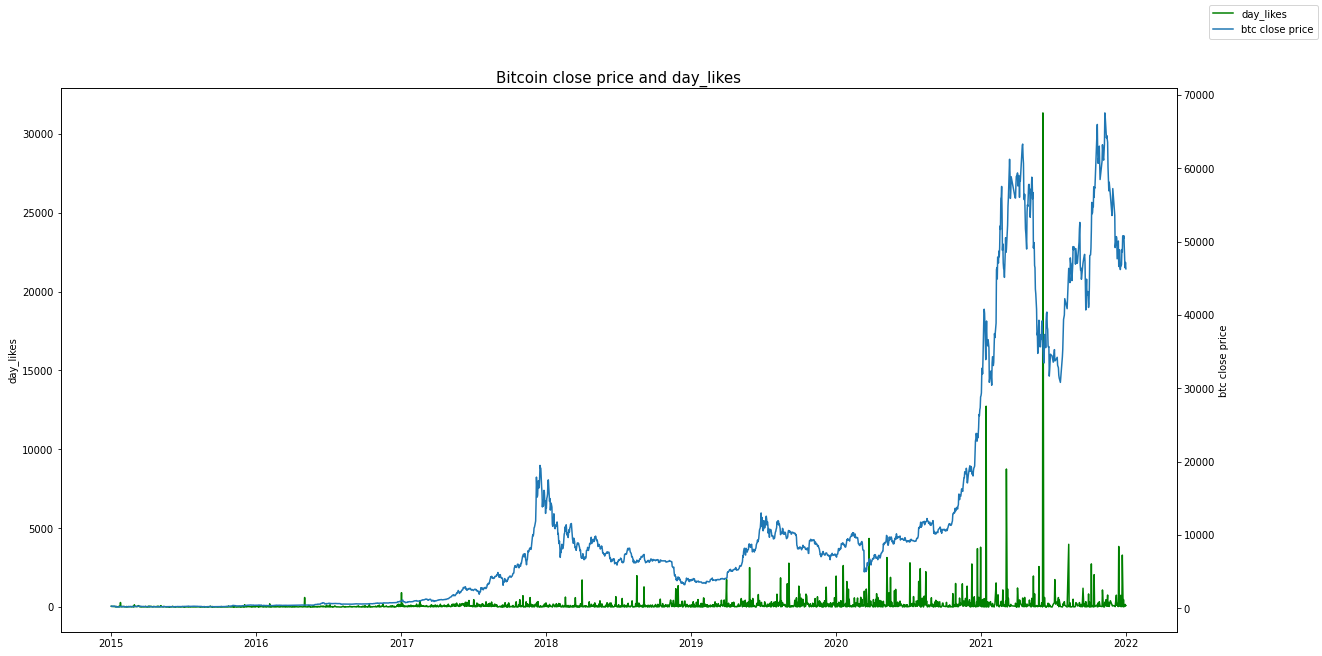

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax1 = ax.twinx()
ax.plot(final_dataset.date, final_dataset.day_likes, label='day_likes',color ='g')
ax1.plot(final_dataset.date, final_dataset.Close, label='btc close price')
ax.set_ylabel('day_likes')
ax1.set_ylabel('btc close price')
plt.title("Bitcoin close price and day_likes", fontsize=15)

fig.legend()

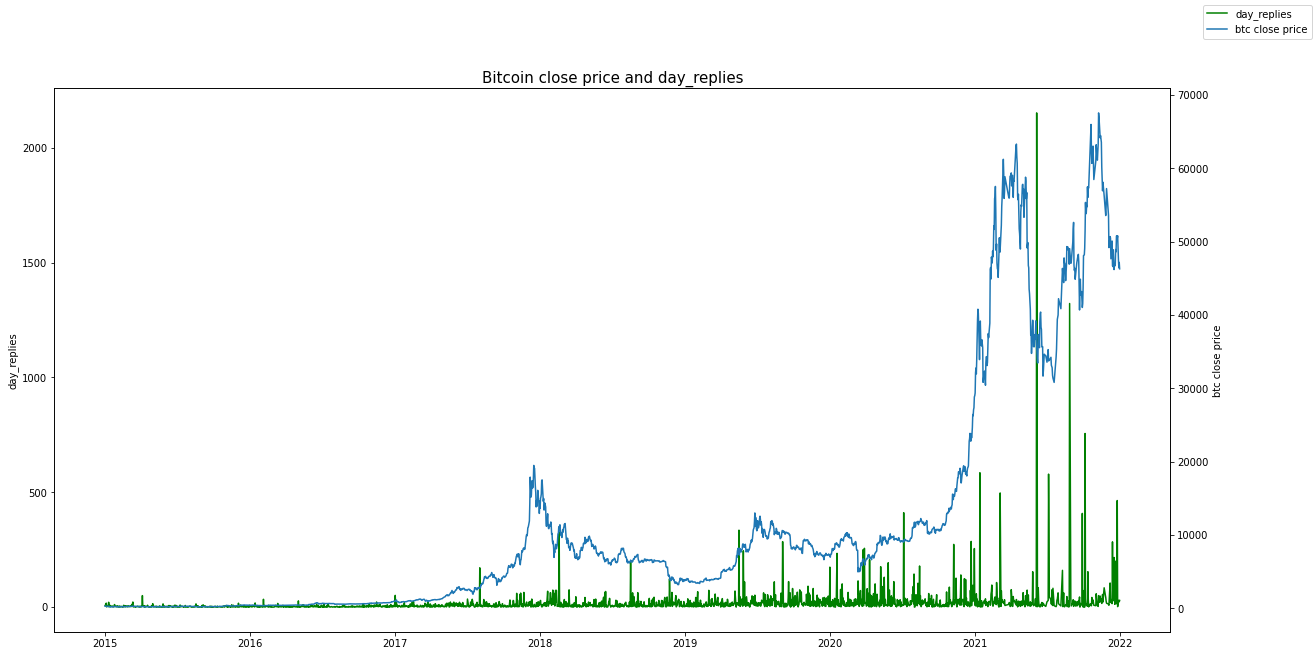

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax1 = ax.twinx()
ax.plot(final_dataset.date, final_dataset.day_replies, label='day_replies',color ='g')
ax1.plot(final_dataset.date, final_dataset.Close, label='btc close price')
ax.set_ylabel('day_replies')
ax1.set_ylabel('btc close price')
plt.title("Bitcoin close price and day_replies", fontsize=15)

fig.legend()

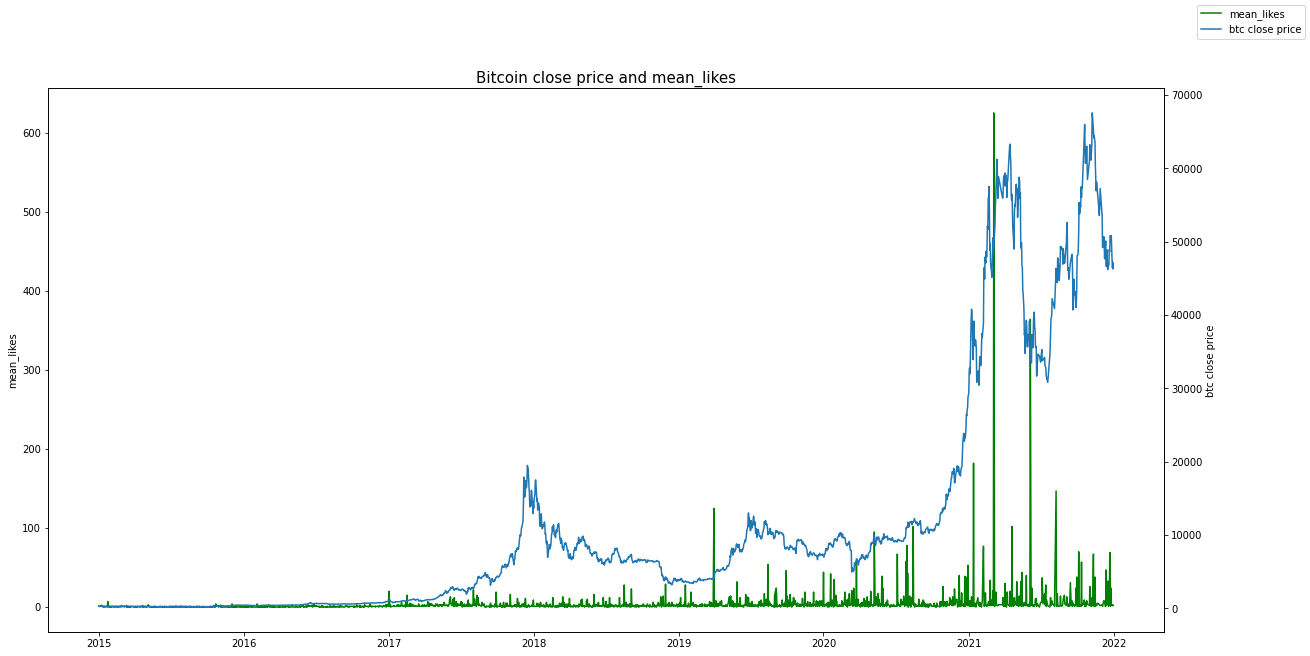

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax1 = ax.twinx()
ax.plot(final_dataset.date, final_dataset.mean_likes, label='mean_likes',color ='g')
ax1.plot(final_dataset.date, final_dataset.Close, label='btc close price')
ax.set_ylabel('mean_likes')
ax1.set_ylabel('btc close price')
plt.title("Bitcoin close price and mean_likes", fontsize=15)

fig.legend()

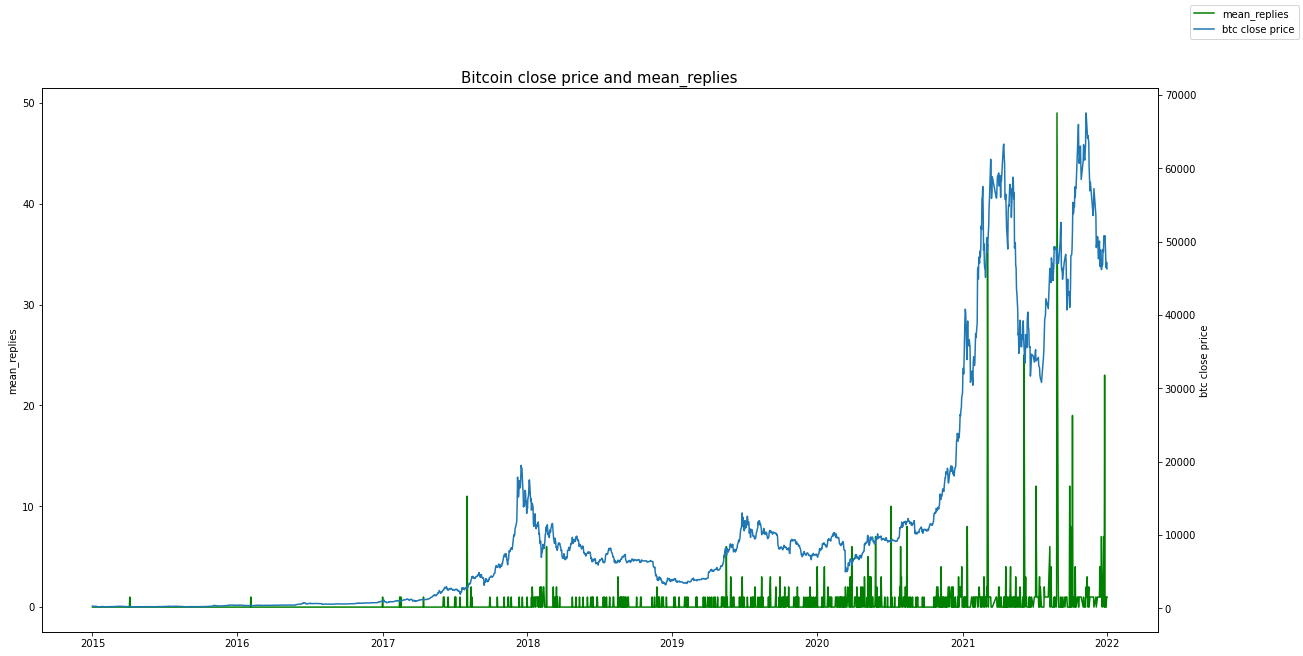

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax1 = ax.twinx()
ax.plot(final_dataset.date, final_dataset.mean_replies, label='mean_replies',color ='g')
ax1.plot(final_dataset.date, final_dataset.Close, label='btc close price')
ax.set_ylabel('mean_replies')
ax1.set_ylabel('btc close price')
plt.title("Bitcoin close price and mean_replies", fontsize=15)

fig.legend()

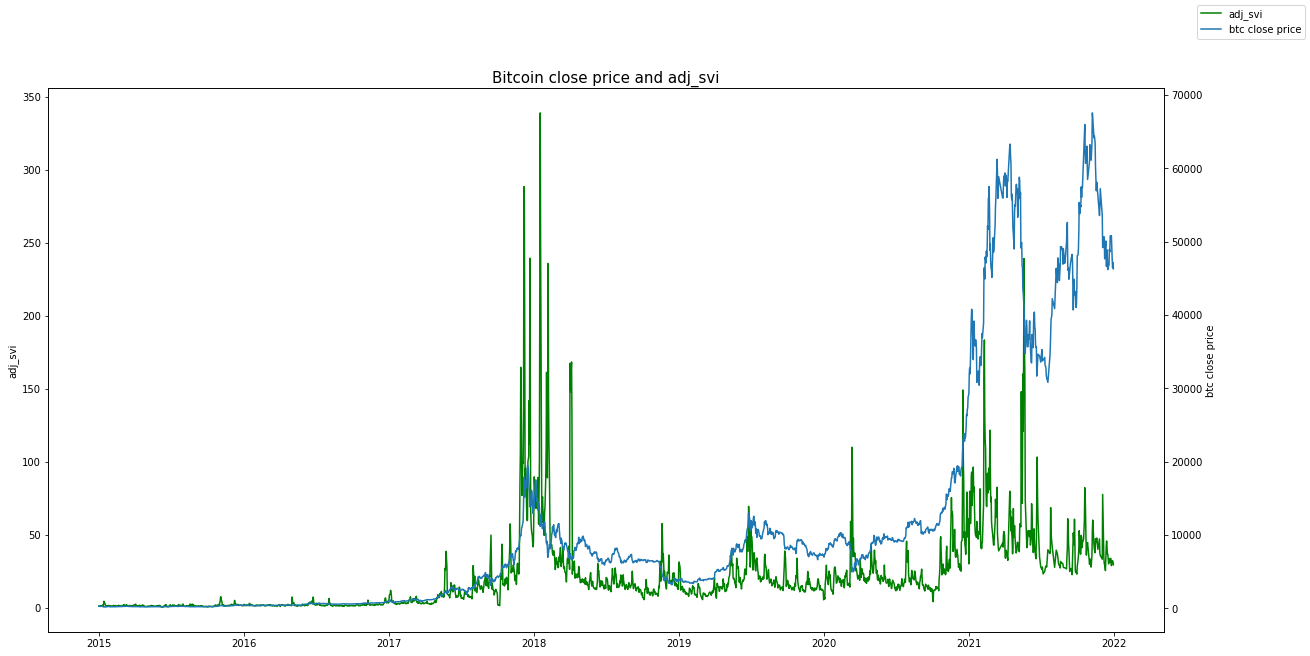

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax1 = ax.twinx()
ax.plot(final_dataset.date, final_dataset.adj_svi, label='adj_svi',color ='g')
ax1.plot(final_dataset.date, final_dataset.Close, label='btc close price')
ax.set_ylabel('adj_svi')
ax1.set_ylabel('btc close price')
plt.title("Bitcoin close price and adj_svi", fontsize=15)

fig.legend()

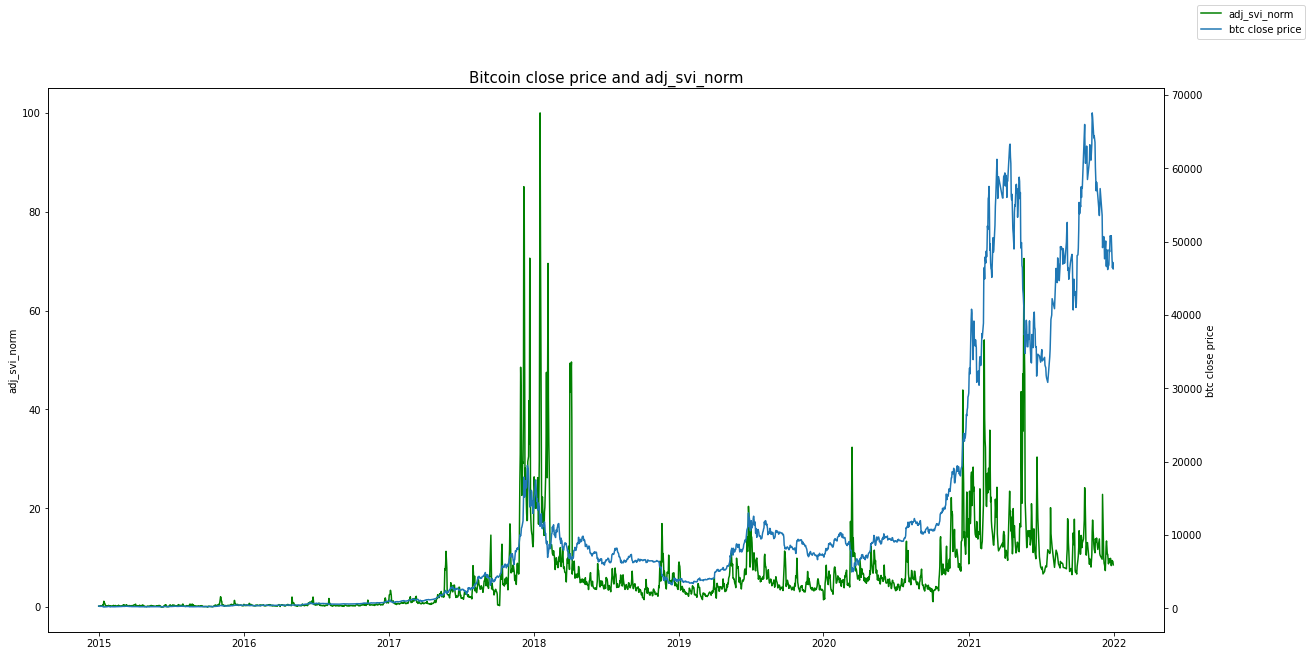

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

ax1 = ax.twinx()
ax.plot(final_dataset.date, final_dataset.adj_svi_norm, label='adj_svi_norm',color ='g')
ax1.plot(final_dataset.date, final_dataset.Close, label='btc close price')
ax.set_ylabel('adj_svi_norm')
ax1.set_ylabel('btc close price')
plt.title("Bitcoin close price and adj_svi_norm", fontsize=15)

fig.legend()